In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/My Drive/Comys_Hackathon5'

In [ ]:
import os

print(os.listdir(dataset_path))

['Task_A', 'Task_B', 'Gender_Classifier.h5', 'Gender_Classifier.keras', 'Face_Recognizer.keras']


In [ ]:
# Replace with your actual path if needed
base_path = '/content/drive/My Drive/Comys_Hackathon5'

# Task A: Gender Classification
task_a_train = f"{base_path}/Task_A/train"
task_a_val = f"{base_path}/Task_A/val"

# Task B: Face Recognition (uses entire folder with subfolders as classes)
task_b = f"{base_path}/Task_B"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_a = ImageDataGenerator(rescale=1./255)

train_gen_a = datagen_a.flow_from_directory(
    task_a_train,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_gen_a = datagen_a.flow_from_directory(
    task_a_val,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 1926 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model_a = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model_a.trainable = False  # Freeze base model

model_a = models.Sequential([
    base_model_a,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

model_a.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_a.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history_a = model_a.fit(
    train_gen_a,
    validation_data=val_gen_a,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 637s 10s/step - accuracy: 0.8323 - loss: 0.3967 - val_accuracy: 0.9028 - val_loss: 0.2630
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.9307 - loss: 0.1787 - val_accuracy: 0.9005 - val_loss: 0.2479
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9324 - loss: 0.1690 - val_accuracy: 0.9052 - val_loss: 0.2372
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.9409 - loss: 0.1567 - val_accuracy: 0.9005 - val_loss: 0.2618
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.9475 - loss: 0.1393 - val_accuracy: 0.9076 - val_loss: 0.2304
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9483 - loss: 0.1428 - val_accuracy: 0.9076 - val_loss: 0.2336
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.9384 - loss: 0.1550 - val_accuracy: 0.9028 - val_loss: 0.2477
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9511 - loss: 0.1234 - val_accuracy: 0.9123 - 

In [ ]:
model_a.save(f"{base_path}/Gender_Classifier.keras")

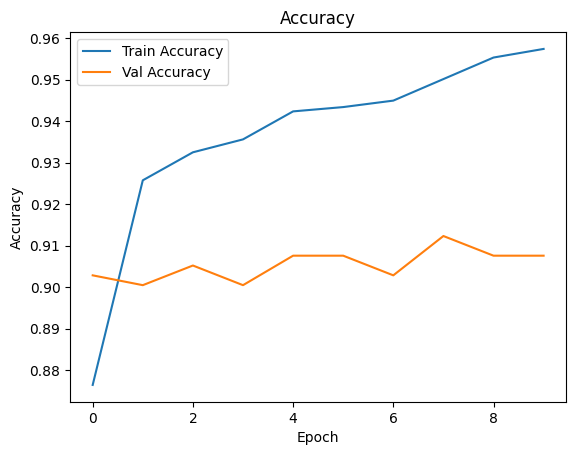

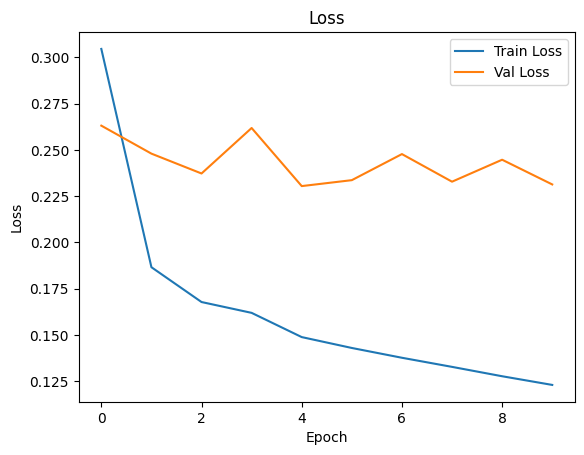

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history_a.history['accuracy'], label='Train Accuracy')
plt.plot(history_a.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history_a.history['loss'], label='Train Loss')
plt.plot(history_a.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
val_loss, val_acc = model_a.evaluate(val_gen_a)
print(f"Validation Accuracy: {val_acc:.2f}")
print(f"Validation Loss: {val_loss:.2f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9202 - loss: 0.1876
Validation Accuracy: 0.91
Validation Loss: 0.23


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


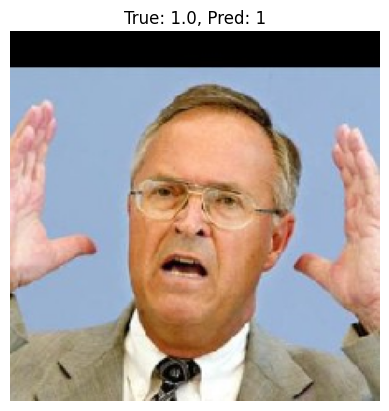

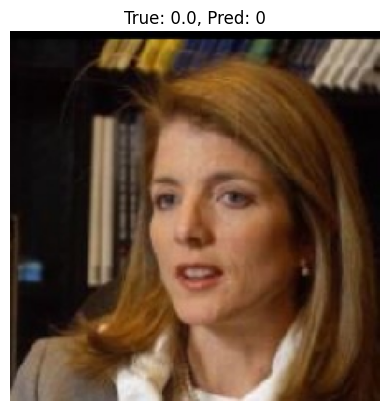

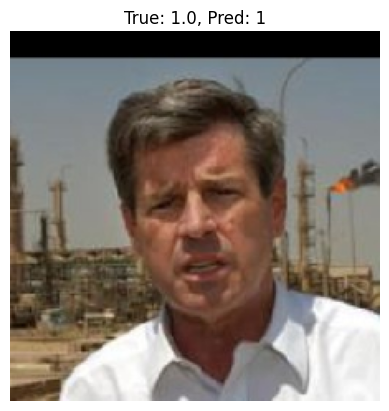

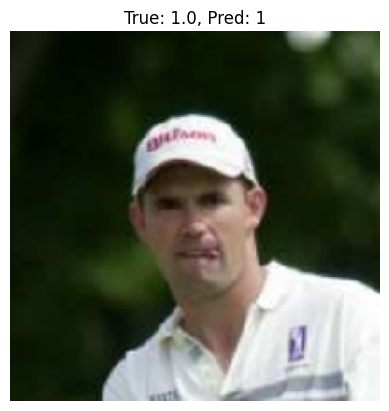

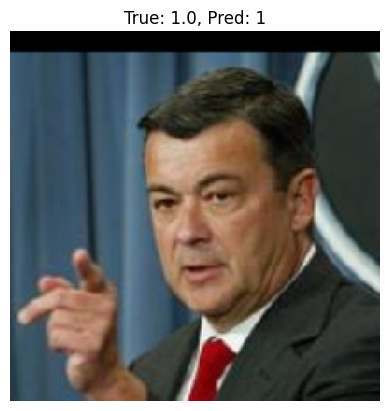

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Get a batch from the validation generator
x_batch, y_batch = next(val_gen_a)

# Predict
y_pred = model_a.predict(x_batch)
y_pred_classes = (y_pred > 0.5).astype(int)

# Compare predictions and true labels for first 5 images
for i in range(5):
    plt.imshow(x_batch[i])
    plt.title(f"True: {y_batch[i]}, Pred: {y_pred_classes[i][0]}")
    plt.axis('off')
    plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make sure the generator starts from the beginning
val_gen_a.reset()

y_true = []
y_pred = []

# Loop over all batches in the generator
for i in range(len(val_gen_a)):
    x_batch, y_batch = next(val_gen_a)  # ✅ fixed!
    y_true.extend(y_batch)
    y_pred.extend(model_a.predict(x_batch).flatten())

# Convert to binary labels
y_pred_bin = np.array(y_pred) > 0.5

print(classification_report(y_true, y_pred_bin))
print(confusion_matrix(y_true, y_pred_bin))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
              precision    recall  f1-score   support

         0.0       0.81      0.66      0.73        79
         1.0       0.92      0.97      0.94       343

    accuracy                           0.91       422
   macro avg       0.87      0.81      0.84       422
weighted avg       0.90      0.91      0.90       422

[[ 52  27]
 [ 12 331]]


In [ ]:
# ---
# Task B — Face Recognition
# ---

In [ ]:
datagen_b = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen_b = datagen_b.flow_from_directory(
    task_b,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen_b = datagen_b.flow_from_directory(
    task_b,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

num_classes_b = train_gen_b.num_classes
print(f"Number of unique persons (classes): {num_classes_b}")


Found 15026 images belonging to 2 classes.
Found 3756 images belonging to 2 classes.
Number of unique persons (classes): 2


In [ ]:
base_model_b = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model_b.trainable = False  # Freeze base

model_b = models.Sequential([
    base_model_b,
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes_b, activation='softmax')
])

model_b.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_b.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history_b = model_b.fit(
    train_gen_b,
    validation_data=val_gen_b,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 5014s 11s/step - accuracy: 0.7915 - loss: 0.5553 - val_accuracy: 0.8017 - val_loss: 0.5056
Epoch 2/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 944s 2s/step - accuracy: 0.8159 - loss: 0.4708 - val_accuracy: 0.8059 - val_loss: 0.4954
Epoch 3/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 964s 2s/step - accuracy: 0.8173 - loss: 0.4545 - val_accuracy: 0.8086 - val_loss: 0.5144
Epoch 4/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 1019s 2s/step - accuracy: 0.8210 - loss: 0.4395 - val_accuracy: 0.8184 - val_loss: 0.5359
Epoch 5/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 947s 2s/step - accuracy: 0.8186 - loss: 0.4289 - val_accuracy: 0.8043 - val_loss: 0.5127
Epoch 6/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 955s 2s/step - accuracy: 0.8265 - loss: 0.4229 - val_accuracy: 0.7804 - val_loss: 0.5266
Epoch 7/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 990s 2s/step - accuracy: 0.8279 - loss: 0.4206 - val_accuracy: 0.7588 - val_loss: 0.5408
Epoch 8/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 971s 2s/step - accuracy: 0.8229 - loss: 0.4163 - val_a

In [ ]:
model_b.save(f"{base_path}/Face_Recognizer.keras")

In [ ]:
import os

# Show everything under Task_B
print(os.listdir(task_b))


['val', 'train']


In [ ]:
for folder in os.listdir(task_b):
    print(f"{folder}: {os.listdir(os.path.join(task_b, folder))}")


val: ['046_frontal', '018_frontal', '017_frontal', '023_frontal', '024_frontal', '041_frontal', '037_frontal', '033_frontal', '009_frontal', '034_frontal', '108_frontal', '105_frontal', '078_frontal', '070_frontal', '083_frontal', '098_frontal', '112_frontal', '079_frontal', '120_frontal', '091_frontal', '084_frontal', '080_frontal', '050_frontal', '052_frontal', '049_frontal', '061_frontal', '069_frontal', '058_frontal', 'Bruce_Weber', 'Andy_Griffith', 'Alicia_Molik', 'Adam_Kennedy', 'Bill_Fennelly', 'Alanis_Morissette', 'Bing_Crosby', 'Adrian_Nastase', 'Albert_Brooks', 'Billy_Gilman', 'Bill_Lerach', 'Ai_Sugiyama', 'Allison_Searing', 'Boutros_Boutros_Ghali', 'Aparna_Pillai', 'Arnold_Scott', 'Aretha_Franklin', 'Ari_Bousbib', 'Barbara_Boxer', 'Aaron_Peirsol', 'Bill_Readdy', 'Ben_Glisan', 'Alain_Cervantes', 'Alexandre_Vinokourov', 'Danny_Ainge', 'Charles_Cope', 'Daniel_Darnell', 'Charlotte_Church', 'Daja_Bedanova', 'Cate_Blanchett', 'Caroline_Kennedy', 'Christian_Von_Wernich', 'Chris_Col

In [ ]:
# Load the model if not already loaded
from tensorflow.keras.models import load_model

# Define the folder path
base_path = "/content/drive/My Drive/Comys_Hackathon5/Task_B"

# Replace with your actual model path
model_path = f"{base_path}/Face_Recognizer.keras"

# Load
model = load_model(model_path)

# Now you can safely do:
pred = model.predict(img_array)
print(pred)

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Example: use one image from train/001_frontal
img_path = f"{task_b}/train/001_frontal/your_image.jpg"

# Or list files dynamically:
folder = "001_frontal"
folder_path = f"{task_b}/train/{folder}"
print("Files in folder:", os.listdir(folder_path))
img_name = os.listdir(folder_path)[0]

# Load and show
img = image.load_img(f"{folder_path}/{img_name}", target_size=(224, 224))
plt.imshow(img)
plt.show()

# Preprocess and predict
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

pred = model.predict(img_array)
print(pred)


ValueError: File not found: filepath=/content/drive/My Drive/Comys_Hackathon5/Task_B/Face_Recognizer.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
# 1️⃣ Show exactly what files & folders are in your Task_B folder:
!ls -lh "/content/drive/My Drive/Comys_Hackathon5/Task_B"

# 2️⃣ Also check all .keras files in your entire Hackathon folder:
!find "/content/drive/My Drive/Comys_Hackathon5" -name "*.keras"

# 3️⃣ And any .h5 files too:
!find "/content/drive/My Drive/Comys_Hackathon5" -name "*.h5"



total 8.0K
drwx------ 2 root root 4.0K Jun 16 02:19 train
drwx------ 2 root root 4.0K Jun 16 02:19 val
^C
^C


Files in folder: ['001_frontal.jpg', 'distortion']


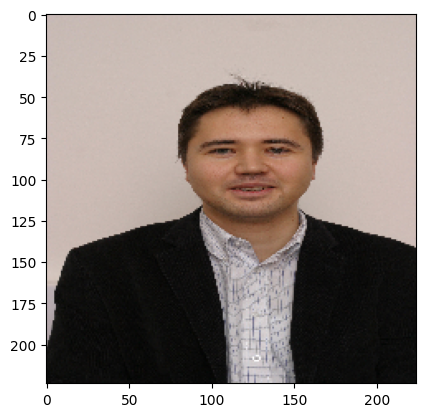

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.4634502  0.53654987]]


In [ ]:
# Load the model if not already loaded
from tensorflow.keras.models import load_model
import numpy as np # Added to resolve potential later errors
from tensorflow.keras.preprocessing import image # Added for later image processing
import matplotlib.pyplot as plt # Added for later plotting

# Define the correct folder path where the model was SAVED
# This should be /content/drive/My Drive/Comys_Hackathon5
base_path_for_model = "/content/drive/My Drive/Comys_Hackathon5"


# Define the folder path for Task_B data
task_b = "/content/drive/My Drive/Comys_Hackathon5/Task_B" # Keeping this for loading image data

# Replace with your actual model path
# Construct the path using the correct base path for the model
model_path = f"{base_path_for_model}/Face_Recognizer.keras"

# Load
model = load_model(model_path)

# --- Rest of your code for prediction ---

# Example: use one image from train/001_frontal
# img_path = f"{task_b}/train/001_frontal/your_image.jpg" # This line was commented out, keeping it that way

# Or list files dynamically:
folder = "001_frontal"
# Check if the 'train' folder exists within task_b before listing
train_folder_path_b = f"{task_b}/train"
if os.path.exists(train_folder_path_b) and os.path.isdir(train_folder_path_b):
    folder_path = f"{train_folder_path_b}/{folder}"
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        files_in_folder = os.listdir(folder_path)
        print("Files in folder:", files_in_folder)
        if files_in_folder: # Check if the folder is not empty
            img_name = files_in_folder[0]

            # Load and show
            img = image.load_img(f"{folder_path}/{img_name}", target_size=(224, 224))
            plt.imshow(img)
            plt.show()

            # Preprocess and predict
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.

            pred = model.predict(img_array)
            print(pred)
        else:
            print(f"No files found in folder: {folder_path}")
    else:
        print(f"Folder not found: {folder_path}")
else:
     print(f"'train' directory not found at: {train_folder_path_b}. Please ensure Task_B contains a 'train' directory with class subfolders.")

In [ ]:
pred = model.predict(img_array)
print(pred)
predicted_class_index = np.argmax(pred)
print("Predicted class index:", predicted_class_index)

# To get the actual class name:
print("Class indices:", train_gen_b.class_indices)
# OR
class_names = list(train_gen_b.class_indices.keys())
print("Predicted class name:", class_names[predicted_class_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[0.4634502  0.53654987]]
Predicted class index: 1


NameError: name 'train_gen_b' is not defined

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Recreate validation generator (if needed)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)
val_gen_b = val_datagen.flow_from_directory(
    f"{task_b}/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict on all validation images
preds = model.predict(val_gen_b)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen_b.classes

print(classification_report(y_true, y_pred))
print("Validation Accuracy:", accuracy_score(y_true, y_pred))


Found 3376 images belonging to 250 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


106/106 ━━━━━━━━━━━━━━━━━━━━ 795s 7s/step
              precision    recall  f1-score   support

           0       0.00      1.00      0.01         8
           1       0.00      0.12      0.00         8
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         8
          16       0.00      0.00      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Recreate validation generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)
val_gen_b = val_datagen.flow_from_directory(
    f"{task_b}/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict
preds = model.predict(val_gen_b)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen_b.classes

print(classification_report(y_true, y_pred))
print("Validation Accuracy:", accuracy_score(y_true, y_pred))

Found 3376 images belonging to 250 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


106/106 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step
              precision    recall  f1-score   support

           0       0.00      1.00      0.01         8
           1       0.00      0.12      0.00         8
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         8
          16       0.00      0.00      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
